In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_theme(style="darkgrid")

In [120]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")

In [121]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [122]:
df.drop(["Name", "CustomerID"], axis=1, inplace=True)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [123]:
print("Missing values:")
df.isnull().sum()

Missing values:


Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

## No missing values found...

## Detecting Outliers with some visualizations and algorithms

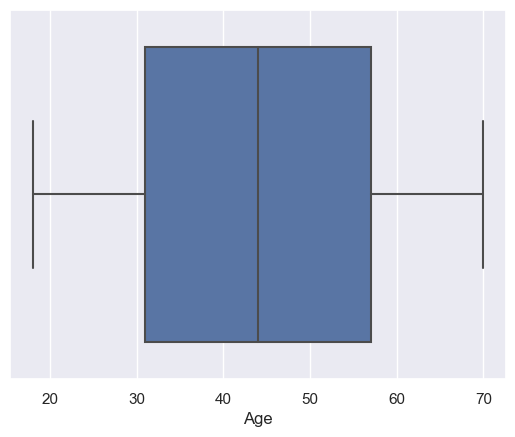

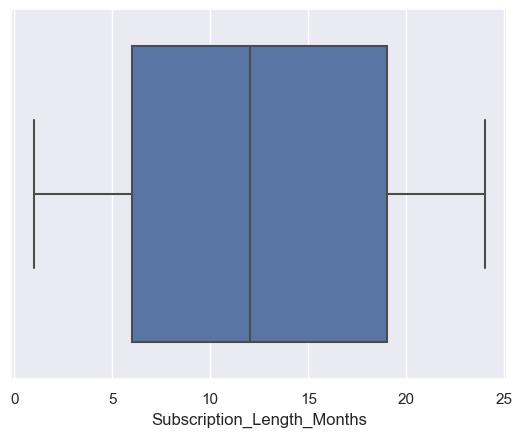

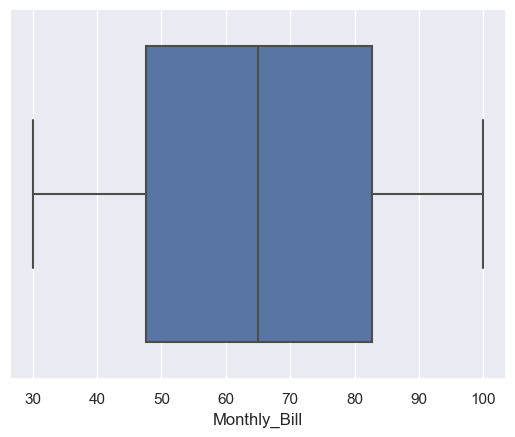

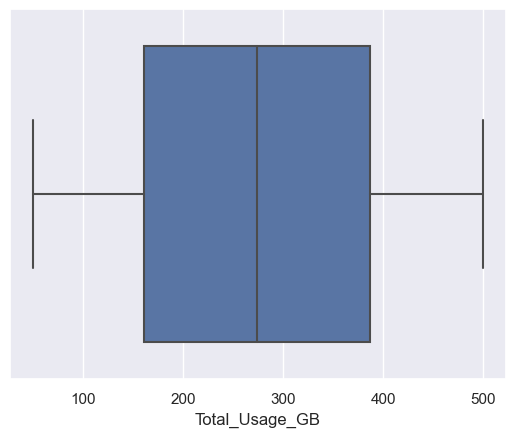

In [124]:
for col in df.columns:
    if df.dtypes[col] != "O" and col != "Churn":
        sns.boxplot(x=df[col])
        plt.show()


## Using Z-score and IQR for outlier detection

In [125]:
def detect_outliers_z(df, col, threshold=3):
    mean = np.mean(df[col])
    std = np.std(df[col])

    zscores = np.abs(np.subtract(df[col], mean)) / std
    outliers = [i for i, z in enumerate(zscores) if abs(z) > threshold]

    return outliers

def detect_outliers_iqr(df, col):
    outlier = set()

    x = sorted(df[col])
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - (1.5 * iqr), q3 + (1.5 * iqr)

    for value in x:
        if (value < lower_bound or value > upper_bound):
            outlier.add(value)
    
    return outlier

print("Outliers using Z-Score")
for col in df.columns:
    if df.dtypes[col] != "O" and col != "Churn":
        outliers = detect_outliers_z(df, col)
        print(f"Total outliers in {col}: {len(outliers)}")

print("-----")

print("Outliers using IQR")
for col in df.columns:
    if df.dtypes[col] != "O" and col != "Churn":
        outliers = detect_outliers_iqr(df, col)
        print(f"Total outliers in {col}: {len(outliers)}")

Outliers using Z-Score
Total outliers in Age: 0
Total outliers in Subscription_Length_Months: 0
Total outliers in Monthly_Bill: 0
Total outliers in Total_Usage_GB: 0
-----
Outliers using IQR
Total outliers in Age: 0
Total outliers in Subscription_Length_Months: 0
Total outliers in Monthly_Bill: 0
Total outliers in Total_Usage_GB: 0


## There are no outliers found...

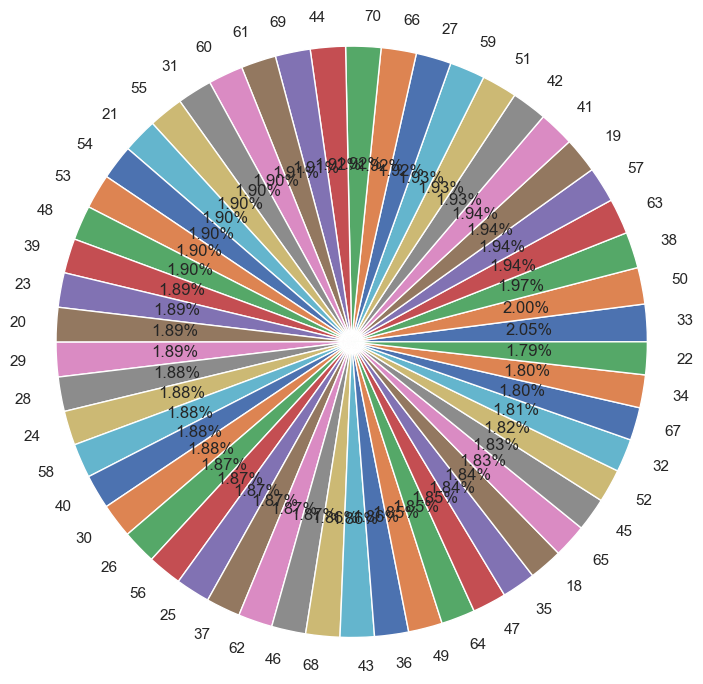

<Figure size 700x500 with 0 Axes>

In [126]:
for col in df.columns[:2]:
    if df.dtypes[col] != "O" and col != "Churn":
        df1 = df[col].value_counts()
        labels = df1.index
        numbers = df1.values

        fig, ax = plt.subplots()
        plt.figure(figsize=(7, 5))
        ax.pie(numbers, labels=labels, labeldistance=1.1, radius=2, autopct='%1.2f%%');        
        plt.show()


## Converting categorical values into numerical values

In [127]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [128]:
print("Unique values in all the categorical coluns.. ")
for col in df.columns:
    if df.dtypes[col] == "O":
        print(f"In {col}: {df[col].unique()}")

Unique values in all the categorical coluns.. 
In Gender: ['Male' 'Female']
In Location: ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [129]:
pd.get_dummies(df["Gender"], drop_first=True)

print("Converting the Categorical values to numerical values")
for col in df.columns:
    if df.dtypes[col] == "O":

        # getting the numerical values
        dummies = pd.get_dummies(df[col], drop_first=True)

        # Removing the columns from the data frame
        df.drop([col], axis=1, inplace=True)

        # Adding the new columns
        df = df.join(dummies)

df.head()

Converting the Categorical values to numerical values


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Male,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


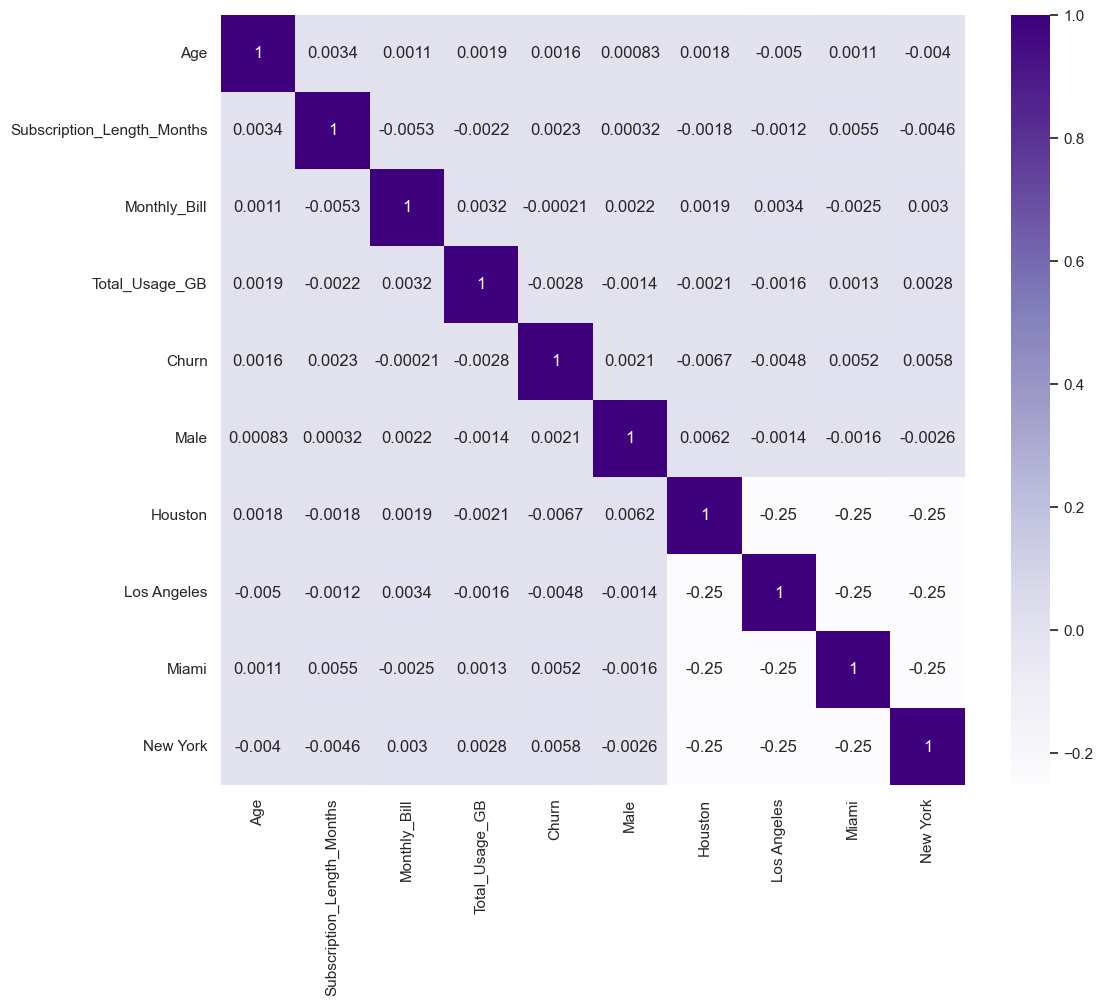

In [131]:
plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples);

## Splitting the dataset

In [ ]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

## Scaling the data (for faster convergence and other useful things)

In [172]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

to_be_scaled = ["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]


def change_to_fit(data):
    """
    Converts the data to a numpy array and returns in a 2-D array
    which is required for standard Scaler
    """
    return np.array(data).reshape(-1, 1)

def scale_data(df_train, df_test, col):
    """
    Scales the data using Standard Scaler for both train and test test

    Returns:
        The transformed column for both the train and test set
    """
    scaler = StandardScaler()
    scaler.fit(change_to_fit(df_train[col]))
    col_train = scaler.transform(change_to_fit(df_train[col]))

    col_test = scaler.transform(change_to_fit(df_test[col]))

    return col_train, col_test

for col in to_be_scaled:
    X_train[col], X_test[col] = scale_data(X_train, X_test, col)
    

scaler = MinMaxScaler()
col = "Age"
scaler.fit(change_to_fit(X_train[col]))
X_train[col] = scaler.transform(change_to_fit(X_train[col]))
X_test[col] = scaler.transform(change_to_fit(X_test[col]))



In [176]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Male,Houston,Los Angeles,Miami,New York
95870,0.442308,-0.068548,0.116747,1.650737,1,0,0,0,1
6942,0.192308,0.075790,1.432603,-0.717434,1,0,0,1,0
63278,0.115385,0.364464,-1.427567,-0.824729,1,0,0,0,0
60678,0.865385,-0.501559,-0.400992,0.110276,0,0,0,1,0
20244,0.096154,0.653138,0.069275,-0.840057,0,0,0,0,1


## Using ML to classify the dataset
### Using Cross-validataion to select the model

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


svm_clf = SVC(kernel="rbf") 
random_forest_clf = RandomForestClassifier(n_estimators=70, max_depth=25)
xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    tree_method="hist",
    early_stopping_rounds=2
)

def cross_validation(clf, X, y, cv=3):
    scores = cross_val_score(clf, X, y, cv=cv)
    print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

for clf in [svm_clf, random_forest_clf, xgb_clf]:
    print(f"Currently running for {str(clf)}")
    cross_validation(clf, X_train, y_train)


Currently running for SVC()


In [ ]:
# Cross validation
# training
# then model selection?
# model selection using diff metrics like .. accuracy, etc.. idk much.
# using randomserach cv for hypterparameters...

# If possible do train using NN too :).

